### Abstract
***Data has been collected on a group of patients, who suffered from the same disease. During their course of treatment, each patient responded to one of 5 drugs, Drug A, Drug B, Drug C, Drug X, and Drug Y.
It is then possible to build a model to find out which drug might be appropriate for a future patient with the same disease. The characteristics of this data set are age, sex, blood pressure, cholesterol of the patients, Sodium to potassium ratio in blood of the patient and the target is the drug to which each of these patients responded.***

***It is a sample of a multiclass classifier, and you can use the training part of the dataset to build a decision tree and then use it to predict the class of an unknown patient or to prescribe a drug to a new patient.***

***There are 6 variables in this data set:***

***4 categorical variables and 2 continuous variables.***

***The feature sets are:***

- Age -> Patient Age
- Sex -> Gender of patient (male or female)
- BP -> Blood Pressure Levels of patient (high, normal, or low)
- Cholesterol -> Cholesterol Levels of patient (high or normal)
- Na_to_K -> Sodium to potassium ratio in blood of patient
- Drug -> Type of drug

### Objective
***For the development of the notebook, we will use a predictive technique through supervised learning for data analysis. This classification algorithm will be carried out through the decision tree technique.***

***Develop a classification model using Decision Tree Algorithm.***

***Develop an ensemble method using the Random Forest model.***

***Dataset exploration using various types of data visualization.***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv('/naman/pgads/drug200.csv')

### Exploratory Data Analysis

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
data.shape

(200, 6)

In [5]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
data.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [7]:
data.duplicated().value_counts()

False    200
dtype: int64

In [8]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

### Feature Engineering / Selection

In [9]:
data.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


<Axes: xlabel='Drug', ylabel='count'>

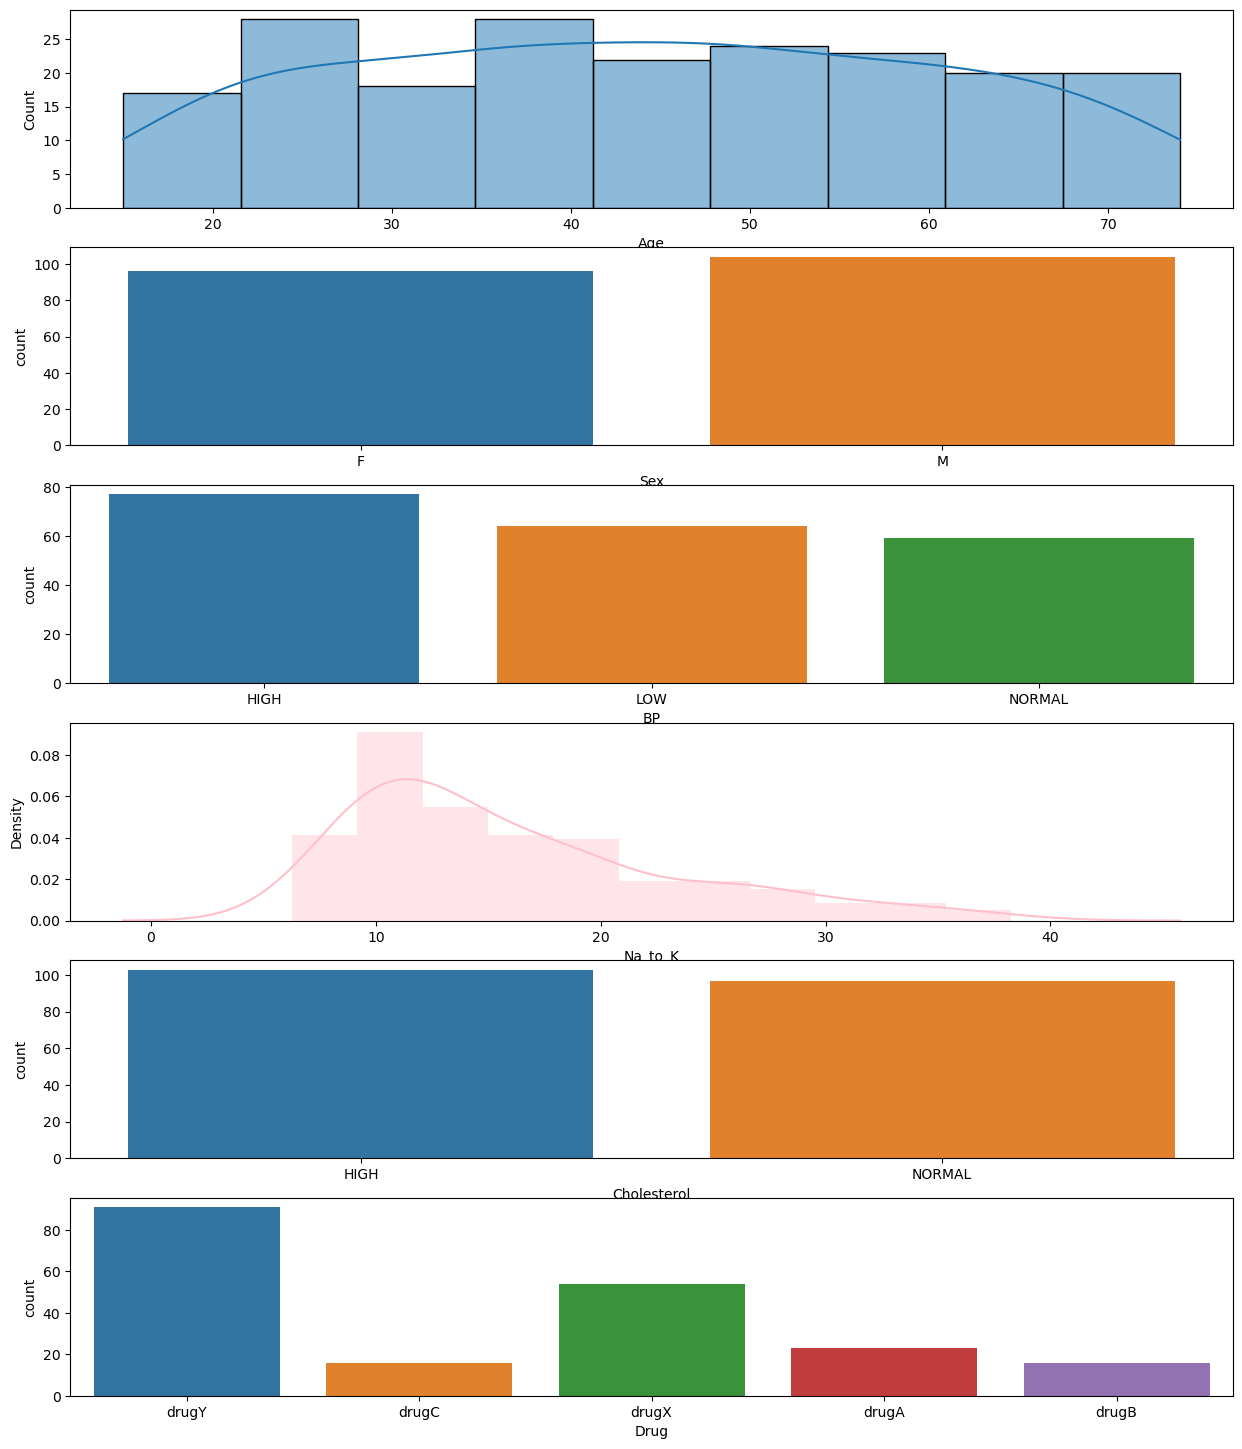

In [10]:
# checking for univariate analysis for each column
fig, ax = plt.subplots(6,1, figsize=(15,18))
sns.histplot(data.Age, kde=True,bins='auto', ax=ax[0])
sns.countplot(data=data, x='Sex', ax=ax[1])
sns.countplot(data=data, x='BP', ax=ax[2])
sns.distplot(data.Na_to_K, kde=True, bins='auto',color='Pink',ax=ax[3])
sns.countplot(data=data, x='Cholesterol', ax=ax[4])
sns.countplot(data=data, x='Drug', ax=ax[5])

#### INIGHTS
- avg age belongs from 35-45 followed age of 21-30.
- There is no major differnence the sex ratio, male count is slightly above 100 and female is around 95.
- Most of the paitents have a High BP.
- Half of the paitents have high Cholestrol and half of them hafve normal.
- Most of the paitents are prescrbied by drugY, followed drugX, drugC is least prescribed.

<Axes: xlabel='Drug', ylabel='Na_to_K'>

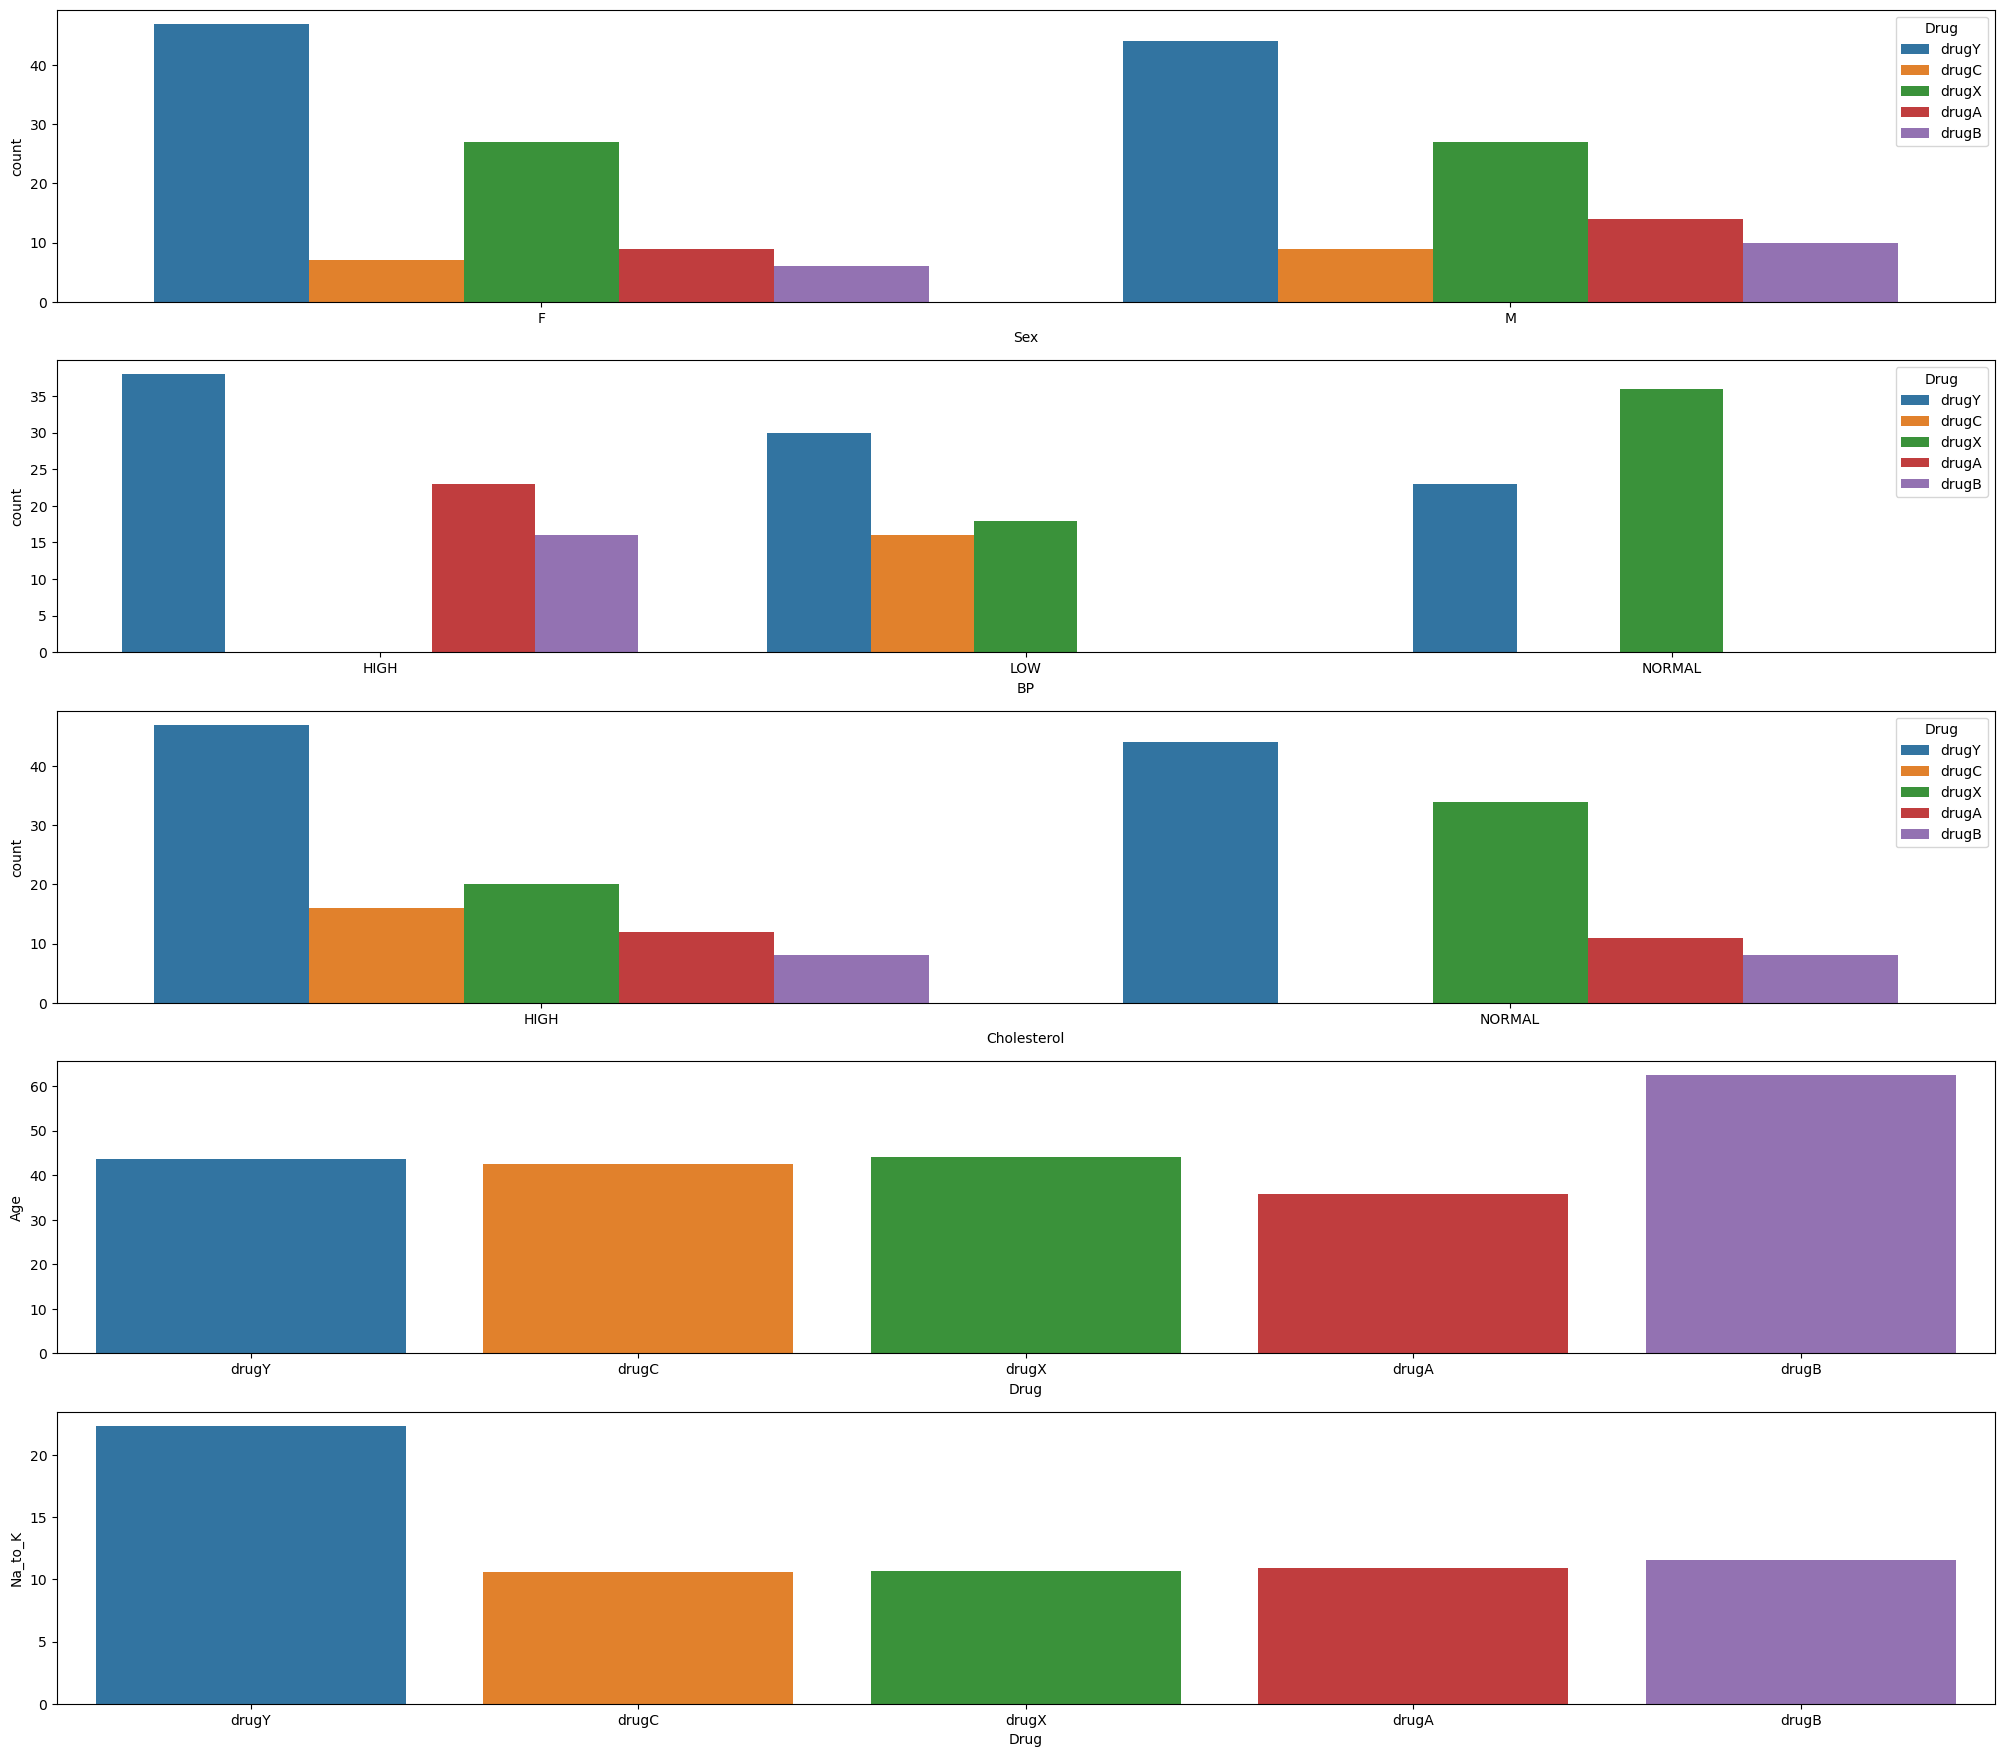

In [11]:
# checking for bi_varirate analysis
fig, ax = plt.subplots(5,1, figsize=(25,22)) 
sns.countplot(x="Sex", hue='Drug', data=data, ax=ax[0])
sns.countplot(x="BP", hue='Drug', data=data, ax=ax[1])
sns.countplot(x="Cholesterol", hue='Drug', data=data, ax=ax[2])
sns.barplot(data=data, x='Drug', y='Age', ci=None, ax=ax[3])
sns.barplot(data=data, x='Drug', y='Na_to_K', ci=None, ax=ax[4])

- Most of the Female is prescrbied by drugY followed by drugX, same for male.
- Those who are having:
1. high BP are not prescribed from drugC, drugX
2. Low BP are not prescribed by drugA and drugB
3. Those with Normal BP are not prescribed by drugC, druga, drugB.
- Those with high Cholestrol level are prescribed by drugY and all the other drugs but for patients with normal cholestrol level are not prescribed by durgC.
- Age group:
1. 45+ is prescribed by drugB.
2. 15-45 is prescribed by drugY, drugC, drugX.
- High value of N_to_k is given drugY and value till 10 N_to_k is given other drugs.

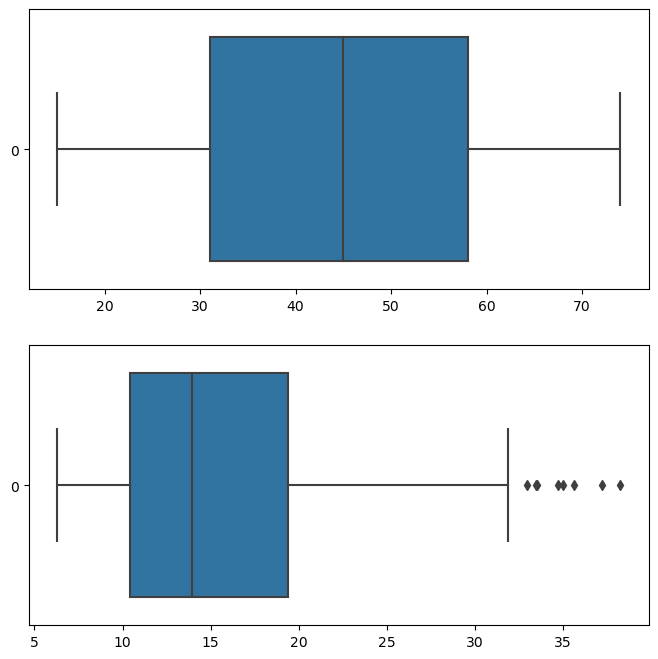

In [12]:
# outliers 
fig,axs=plt.subplots(2,1, figsize=(8,8))
plt1=sns.boxplot(data['Age'],orient='h',ax=axs[0])
plt1=sns.boxplot(data['Na_to_K'],orient='h',ax=axs[1])
plt.show()

- There is no outliers present in the age but some outliers can be seen in the Na_to_k.

In [13]:
# removing outliers
q3 = data.Na_to_K.quantile(0.75)
q1 = data.Na_to_K.quantile(0.25)

iqr = q3-q1

lower = q1 - 1.5 * iqr
upper= q3 + 1.5 * iqr
# filtering
data = data[(data['Na_to_K'] >= lower) & (data['Na_to_K'] <= upper)]

<Axes: >

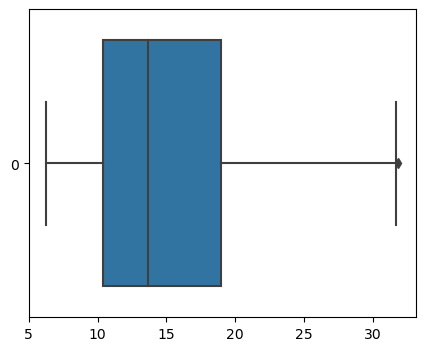

In [14]:
plt.figure(figsize=(5,4))
sns.boxplot(data['Na_to_K'],orient='h')

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Sex','BP','Cholesterol','Drug']
for i in cols:
    data[i] = le.fit_transform(data[i])

In [16]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


- Sex 0-F, 1-M
- BP 0-High,1-Low,2-Normal
- Cholestrol 0-High, 1-Normal
- Drug 0-drugY, 1-drugC 2-drugX, 3-drugA, 4-drugB

### Spliting the data

In [17]:
x = data.drop('Drug', axis=1)
y = data.Drug

In [18]:
# split the train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [19]:
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((153, 5), (39, 5), (39,), (153,))

### Model Building

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [21]:
# Fit the training data
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
pred = dt.predict(x_test)
pred

array([0, 4, 4, 3, 3, 3, 4, 2, 3, 4, 3, 4, 3, 0, 2, 1, 0, 1, 3, 4, 0, 3,
       4, 0, 4, 0, 4, 4, 0, 3, 3, 3, 4, 4, 4, 3, 0, 0, 3])

### Model Evalution

In [30]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Assuming 'y_test' contains the true labels and 'pred' contains the predicted labels

accuracy = accuracy_score(y_test, pred) * 100
f1score = f1_score(y_test, pred, average='macro') * 100

print(f"Accuracy = {accuracy.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 97.4359
F1 Score = 94.8235


Overall Model accuracy is 97% 

In [150]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        13

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39



<Axes: >

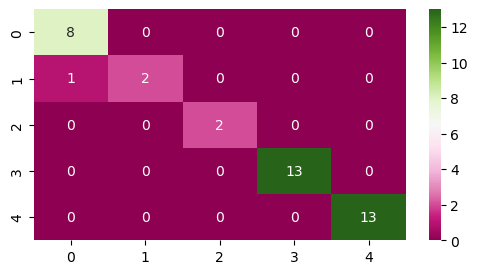

In [151]:
# ploting the confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(y_test,pred), annot=True, cmap='PiYG')